In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('datasets.csv')
data.head()

,Unnamed: 0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [4]:
data=data.iloc[:,1:]

In [5]:
data.tail()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
112,2013,18.88,21.07,24.53,26.97,29.06,28.24,27.50,27.22,26.87,25.63,22.18,19.69
113,2014,18.81,20.35,23.34,26.91,28.45,29.42,28.07,27.42,26.61,25.38,22.53,19.50
114,2015,19.02,21.23,23.52,26.52,28.82,28.15,28.03,27.64,27.04,25.82,22.95,20.21
115,2016,20.92,23.58,26.61,29.56,30.41,29.70,28.18,28.17,27.72,26.81,23.90,21.89
116,2017,20.59,23.08,25.58,29.17,30.47,29.44,28.31,28.12,28.11,27.24,23.92,21.47


In [6]:
col=data.columns[1:]

In [7]:
temp=data.iloc[0,1:]

Text(0.5, 1.0, 'INDIA 1901 temperature data')

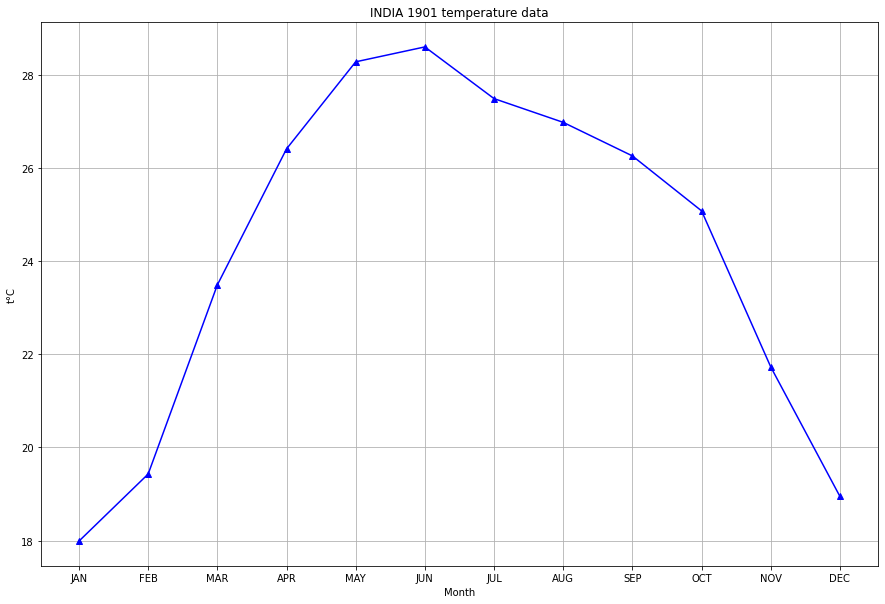

In [8]:
plt.figure(figsize=(15,10))
plt.plot(col,temp,'b-^')
plt.xlabel('Month')
plt.ylabel('t°C')
plt.grid(True)
plt.title('INDIA 1901 temperature data')


In [9]:
np.array(data.iloc[0,1:])

array([17.99, 19.43, 23.49, 26.41, 28.28, 28.6 , 27.49, 26.98, 26.26,
       25.08, 21.73, 18.95])

In [10]:
def preprocesses(file,n):
  r=file.shape[0]
  x_arr=[]
  y_arr=[]
  for i in range(0,r-n):
    try:
      l=[]
      l.append(list(data.iloc[i,1:]))
      l.append(list(data.iloc[i+1,1:]))
      x_arr.append(l)
      y_arr.append(list(data.iloc[i+2,1:]))
    except:
      pass
  return np.array(x_arr),np.array(y_arr)

    


In [11]:
x,y=preprocesses(data,2)

In [12]:
x.shape

(115, 2, 12)

In [13]:
data.shape

(117, 13)

In [14]:
x[-1]


array([[19.02, 21.23, 23.52, 26.52, 28.82, 28.15, 28.03, 27.64, 27.04,
        25.82, 22.95, 20.21],
       [20.92, 23.58, 26.61, 29.56, 30.41, 29.7 , 28.18, 28.17, 27.72,
        26.81, 23.9 , 21.89]])

In [15]:
y.shape

(115, 12)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Dropout
model = Sequential()
model.add(LSTM(500, activation='relu', return_sequences=True, input_shape=(2, 12)))
model.add(LSTM(500, activation='relu'))
model.add(Dense(12))
model.compile(optimizer='adam', loss='mse')

In [17]:
H=model.fit(x, y, epochs=500, verbose=0)

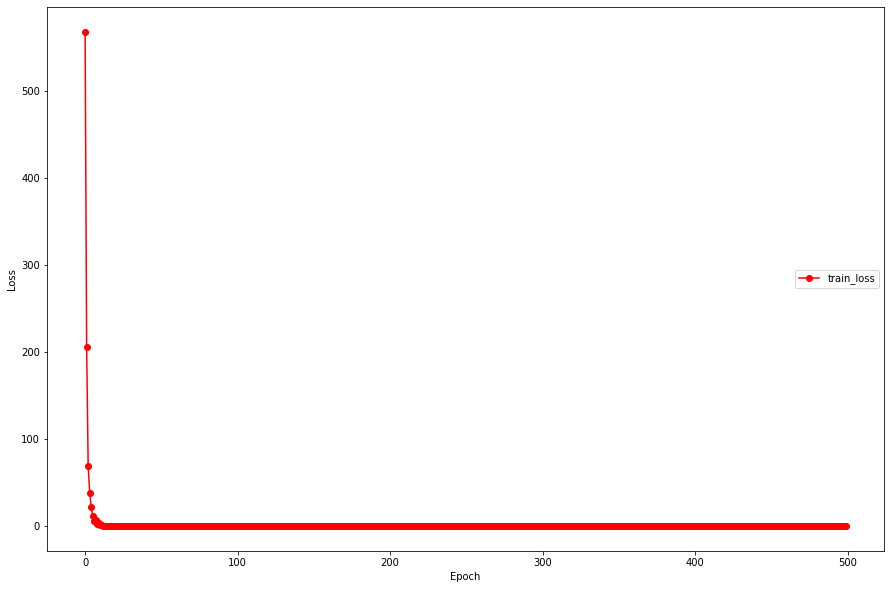

In [18]:
N = 500
plt.figure(figsize=(15,10))
plt.plot(np.arange(0, N), H.history["loss"], 'r-o',label="train_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="center right")


In [19]:
t=[]
test=[]
x1=data.iloc[115,1:]
t.append(x1)
x2=data.iloc[116,1:]
t.append(x2)
test.append(t)
test=np.array(test)

In [20]:
d_2018=model.predict(test)
d_2018

array([[19.724659, 22.097797, 25.288012, 28.24956 , 30.379612, 30.204676,
        29.217506, 28.920208, 28.294682, 26.543295, 23.263664, 21.016064]],
      dtype=float32)

In [21]:
 list(d_2018[0])

[19.724659,
 22.097797,
 25.288012,
 28.24956,
 30.379612,
 30.204676,
 29.217506,
 28.920208,
 28.294682,
 26.543295,
 23.263664,
 21.016064]

In [22]:
H.history['loss'][-1]

0.34257441759109497

In [23]:
t_2017=list(data.iloc[116,1:])
t_2017

[20.59,
 23.08,
 25.58,
 29.17,
 30.47,
 29.44,
 28.31,
 28.12,
 28.11,
 27.24,
 23.92,
 21.47]

In [24]:
t_2016=list(data.iloc[115,1:])
t_2016

[20.92,
 23.58,
 26.61,
 29.56,
 30.41,
 29.7,
 28.18,
 28.17,
 27.72,
 26.81,
 23.9,
 21.89]

Text(0.5, 1.0, 'INDIA 2017 temperature data')

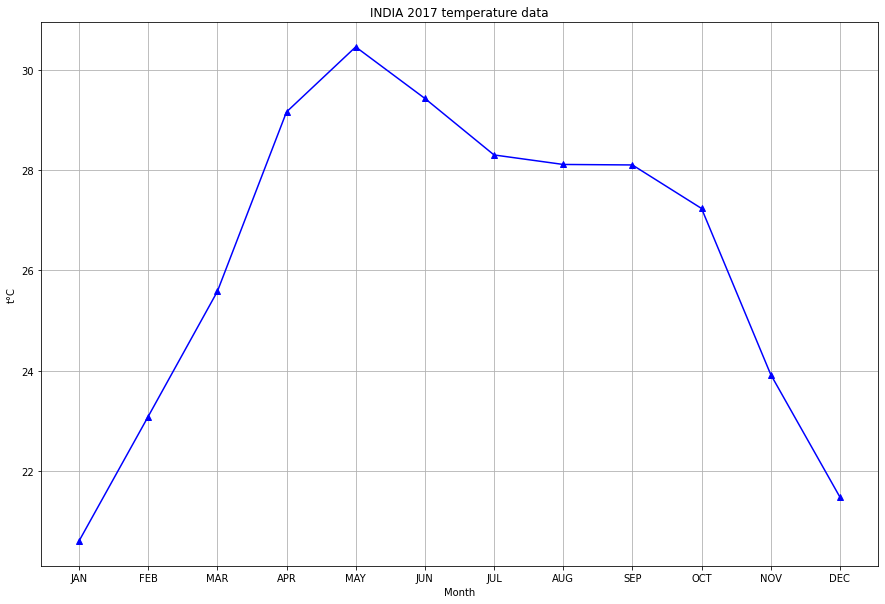

In [25]:
plt.figure(figsize=(15,10))
plt.plot(col,t_2017,'b-^')
plt.xlabel('Month')
plt.ylabel('t°C')
plt.grid(True)
plt.title('INDIA 2017 temperature data')

Text(0.5, 1.0, 'INDIA 2018 temperature data')

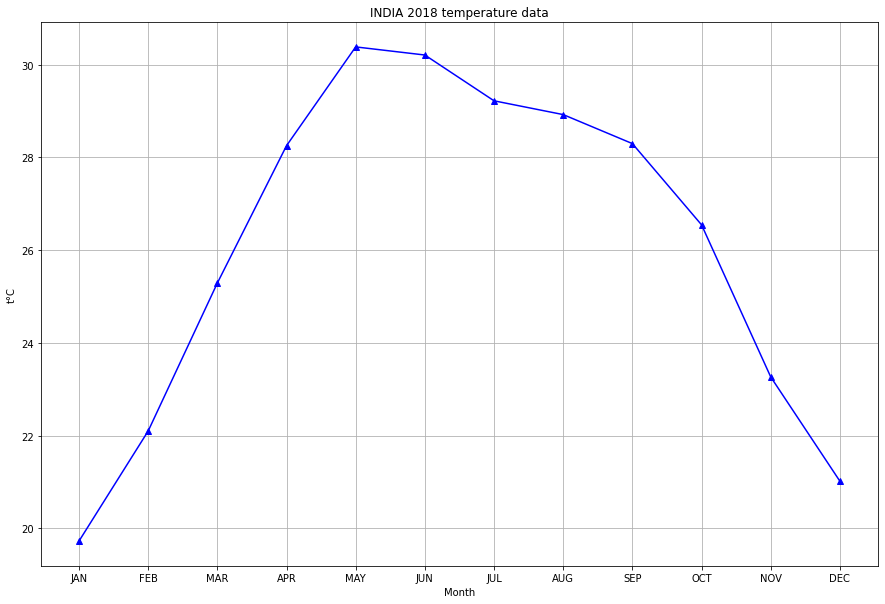

In [26]:
plt.figure(figsize=(15,10))
plt.plot(col,d_2018[0],'b-^')
plt.xlabel('Month')
plt.ylabel('t°C')
plt.grid(True)
plt.title('INDIA 2018 temperature data')

[[19.689949 21.943474 25.189222 28.282955 30.467237 30.213057 29.242373
  28.944443 28.253214 26.543367 23.220312 20.90186 ]]


Text(0.5, 1.0, 'INDIA 2019 temperature data')

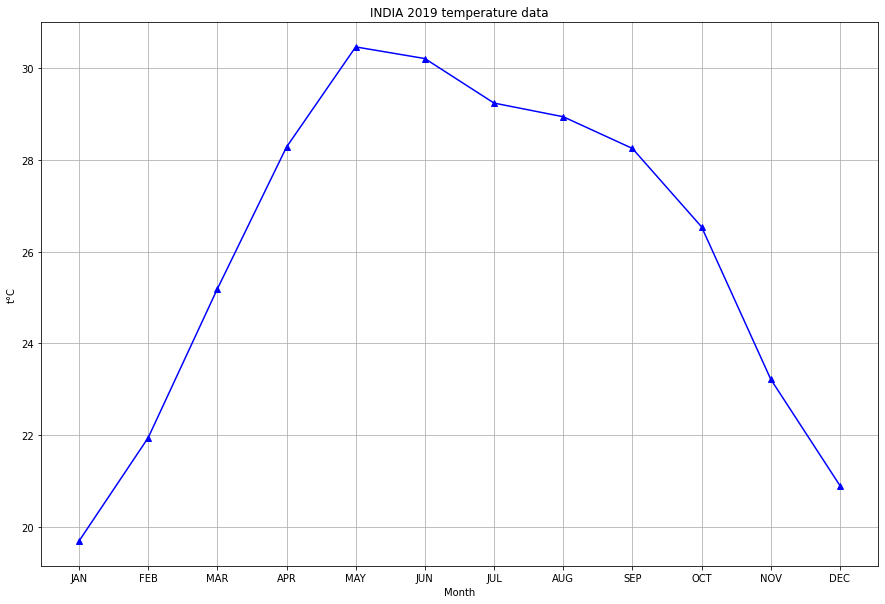

In [29]:
#t_2016
#t_2017
# t=[]
# test=[]
# x1=data.iloc[115,1:]
# t.append(x1)
# x2=data.iloc[116,1:]
# t.append(x2)
# test.append(t)
# test=np.array(test)


year=int(input('enter year'))
t_1=t_2016
t_2=t_2017
for i in range(year-2017):
  t=[]
  test=[]
  x1=t_1
  t.append(x1)
  x2=t_2
  t.append(x2)
  test.append(t)
  test=np.array(test)
  y_hat=model.predict(test)
  t_1=x2
  t_2=list(y_hat[0])


print(y_hat)
plt.figure(figsize=(15,10))
plt.plot(col,y_hat[0],'b-^')
plt.xlabel('Month')
plt.ylabel('t°C')
plt.grid(True)
plt.title(f'INDIA {year} temperature data')


[[19.724659 22.097797 25.288012 28.24956  30.379612 30.204676 29.217506
  28.920208 28.294682 26.543295 23.263664 21.016064]]


Text(0.5, 1.0, 'INDIA 2018 temperature data')

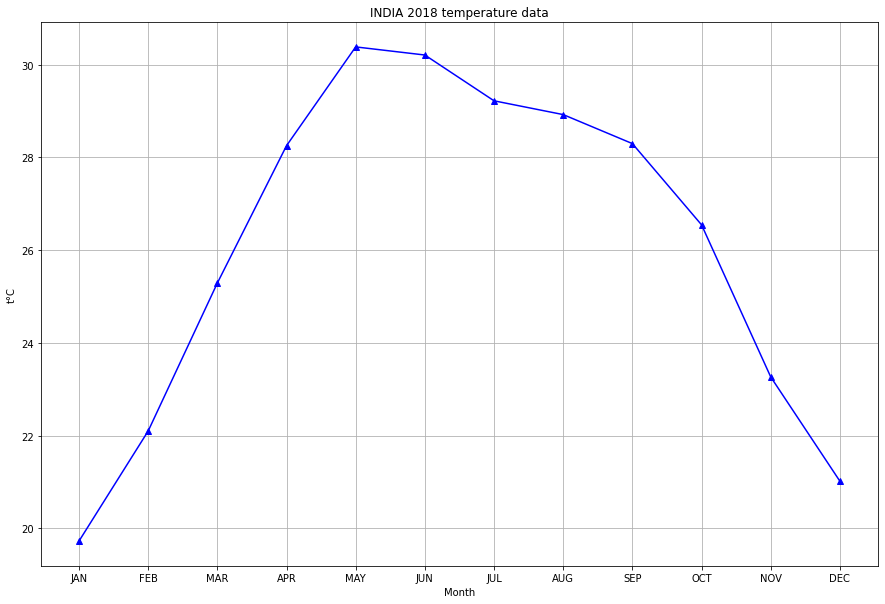

In [28]:
year=int(input('enter year'))
output=[]
t_1=t_2016
t_2=t_2017
for i in range(year-2017):
  t=[]
  test=[]
  x1=t_1
  t.append(x1)
  x2=t_2
  t.append(x2)
  test.append(t)
  test=np.array(test)
  y_hat=model.predict(test)
  t_1=x2
  t_2=list(y_hat[0])


print(y_hat)
plt.figure(figsize=(15,10))
plt.plot(col,y_hat[0],'b-^')
plt.xlabel('Month')
plt.ylabel('t°C')
plt.grid(True)
plt.title(f'INDIA {year} temperature data')

In [30]:
model.save('tmp.h5')